In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [2]:
# Mostly around 12 degrees Kelvin within precision of .4 degrees Kelvin
# There is some random data in here that will throw this off, properly idenitfy and throw out
# the data that does not match the distribution

In [3]:
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

Text(0, 0.5, 'Probability')

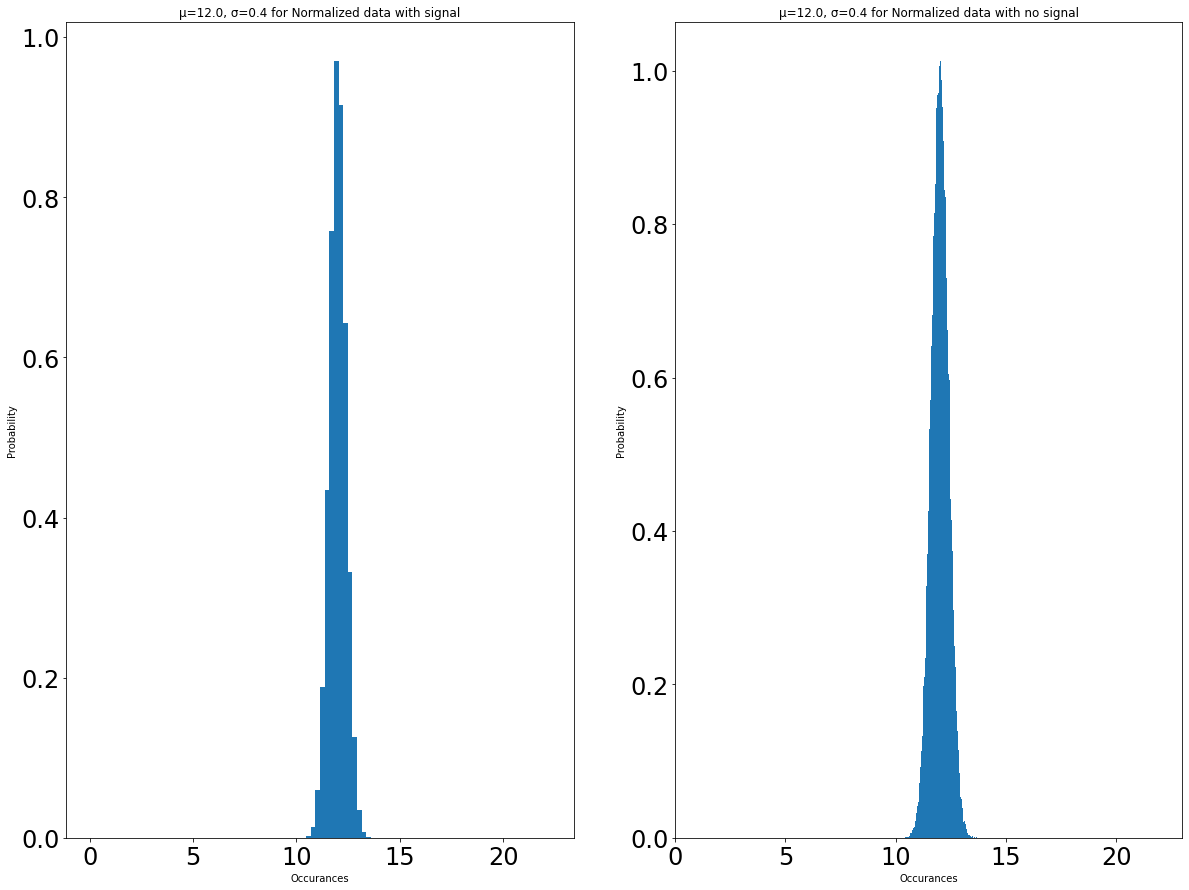

In [65]:
# Plot comparing the graphs of the Signal Normal Distribution and the true Normal Distribution 

mu = 12.; sigma = .4; siz = 100000
signal_distro = np.append(stats.norm.rvs(loc = mu, scale = sigma, size = siz), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
normal_distro = stats.norm.rvs(loc = mu, scale = sigma, size = siz)
fig, (ax,ax1) = plt.subplots(1, 2)
                          
ax.set_title(label=f"\u03bc={mu}, \u03C3={sigma} for Normalized data with signal")
ax.hist(signal_distro,100, density=True)
ax.tick_params(labelsize = 24)
#x = np.linspace(mu-5*sigma,mu+5*sigma,100)
#ax.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma), linewidth = 5, alpha = 1)
ax.set_xlabel('Occurances')
ax.set_ylabel("Probability")
                         
ax1.set_title(label=f"\u03bc={mu}, \u03C3={sigma} for Normalized data with no signal")
ax1.hist(normal_distro,100, density=True)
ax1.tick_params(labelsize = 24)
ax1.set_xlim([0, 23])
#x = np.linspace(mu-5*sigma,mu+5*sigma,100)
#ax.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma), linewidth = 5, alpha = 1)
ax1.set_xlabel('Occurances')
ax1.set_ylabel('Probability')

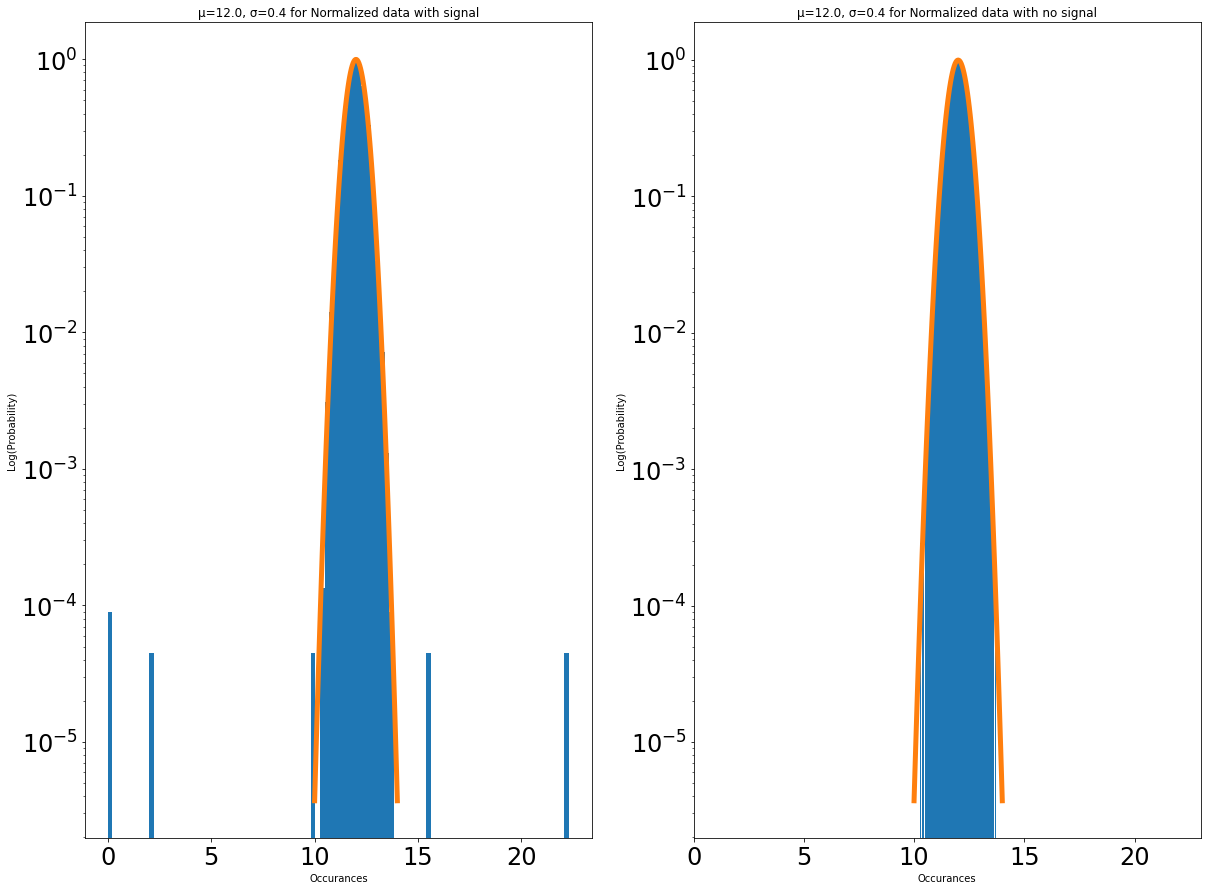

In [68]:
# Plot comparing the graphs of the Log Signal Normal Distribution and the Log true Normal Distribution 

mu = 12.; sigma = .4; siz = 100000
signal_distro = np.append(stats.norm.rvs(loc = mu, scale = sigma, size = siz), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
normal_distro = stats.norm.rvs(loc = mu, scale = sigma, size = siz)
fig, (ax,ax1) = plt.subplots(1, 2)
                          
ax.set_title(label=f"\u03bc={mu}, \u03C3={sigma} for Normalized data with signal")
ax.hist(signal_distro,100, density=True)
ax.tick_params(labelsize = 24)
x = np.linspace(mu-5*sigma,mu+5*sigma,100)
ax.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma), linewidth = 5, alpha = 1)
ax.set_xlabel('Occurances')
ax.set_ylabel('Log(Probability)')
ax.set_yscale('log')
                          
ax1.set_title(label=f"\u03bc={mu}, \u03C3={sigma} for Normalized data with no signal")
ax1.hist(normal_distro,100, density=True)
ax1.tick_params(labelsize = 24)
ax1.set_xlim([0, 23])
x = np.linspace(mu-5*sigma,mu+5*sigma,100)
ax1.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma), linewidth = 5, alpha = 1)
ax1.set_xlabel('Occurances')
ax1.set_ylabel('Log(Probability)')
ax1.set_yscale('log')

My goal is to compare the normal distribution within 5$\sigma$. I will then compare the x values of the signal distribtion to that of the normal distribution within 5$\sigma$. 
- If the data point should lay within the distribution and it is observed that it does, then it will equal TT. 
- If the data point should lay within the distribution and it is observed that it does NOT, then it will equal BT.
- If the data point should not lay within the distribution and it is observed that it does, then it will equal TB.
-  If the data point should not lay within the distribution and it is observed that it does not, then it will equal BB.

Percentage of occurances that appear as a signal: 0.00000029
Sigma value associated with percentage: 5.000


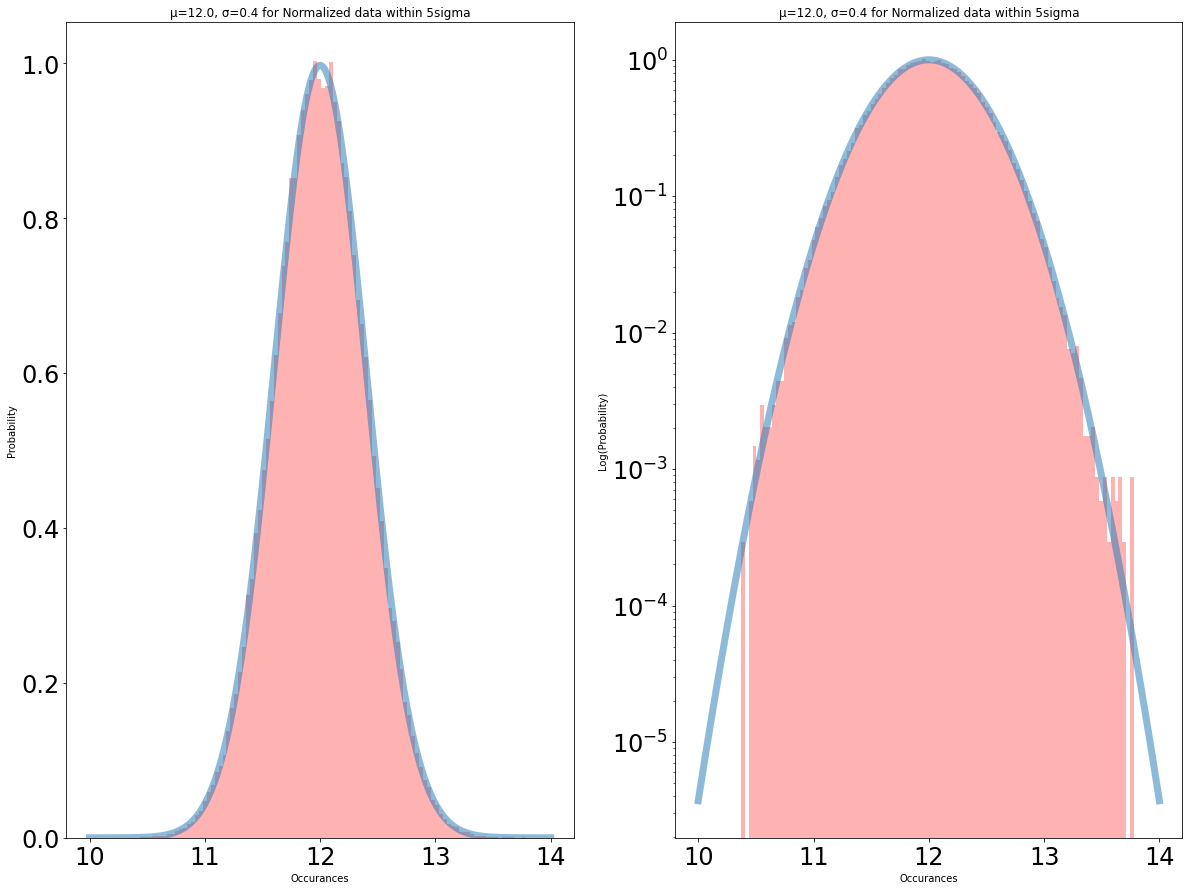

In [75]:
mu = 12.; sigma = .4; siz = 100000
signal_distro = np.append(stats.norm.rvs(loc = mu, scale = sigma, size = siz), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
normal_distro = stats.norm.rvs(loc = mu, scale = sigma, size = siz)
fig, (ax, ax1) = plt.subplots(1, 2)
                          
ax.set_title(label=f"\u03bc={mu}, \u03C3={sigma} for Normalized data within 5sigma")
ax.hist(normal_distro,100, density=True, color='r', alpha=.3)
ax.tick_params(labelsize = 24)
x = np.linspace(mu-5*sigma,mu+5*sigma,1000)
ax.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma), linewidth = 7, alpha = .5)
ax.set_xlabel('Occurances')
ax.set_ylabel('Probability')
#ax.set_yscale('log')

ax1.set_title(label=f"\u03bc={mu}, \u03C3={sigma} for Normalized data within 5sigma")
ax1.hist(normal_distro,100, density=True, color='r', alpha=.3)
ax1.tick_params(labelsize = 24)
x = np.linspace(mu-5*sigma,mu+5*sigma,1000)
ax1.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma), linewidth = 7, alpha = .5)
ax1.set_xlabel('Occurances')
ax1.set_ylabel('Log(Probability)')
ax1.set_yscale('log')

#fill_space = np.linspace(mu-5*sigma,mu+5*sigma,1000)
#ax.fill_between(fill_space, stats.norm.pdf(fill_space,loc = mu, scale = sigma), color = 'g', linewidth = 0, alpha = .9)

prob = 1 - stats.norm.cdf(mu + sigma*5,mu, sigma)
z_val = stats.norm.ppf(1-(prob))

print(f'Percentage of occurances that appear as a signal: {prob:.8f}')
print(f'Sigma value associated with percentage: {z_val:.3f}')

We see that even when we do take the 5$\sigma$ of the normal distribution without any signal, we do yield a percentage that will occur as a signal, although this is a rather small probability, it will still contribute to some error. 

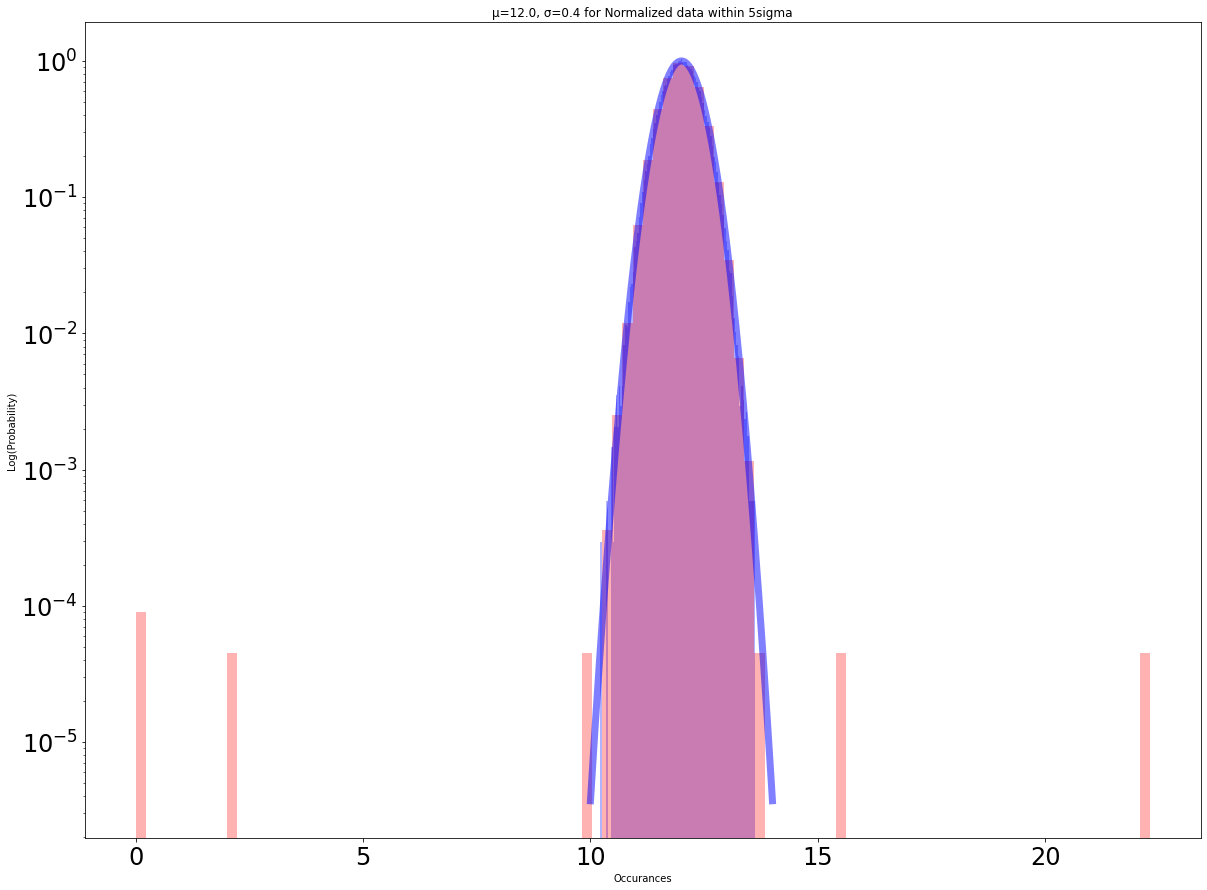

In [85]:
mu = 12.; sigma = .4; siz = 100000
signal_distro = np.append(stats.norm.rvs(loc = mu, scale = sigma, size = siz), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
normal_distro = stats.norm.rvs(loc = mu, scale = sigma, size = siz)
fig, (ax1) = plt.subplots(1, 1)

ax1.set_title(label=f"\u03bc={mu}, \u03C3={sigma} for Normalized data within 5sigma")
ax1.hist(normal_distro,100, density=True, color='b', alpha=.3)
ax1.hist(signal_distro,100, density=True, color='r', alpha=.3)
ax1.tick_params(labelsize = 24)
x = np.linspace(mu-5*sigma,mu+5*sigma,1000)
ax1.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma), color = 'b', linewidth = 7, alpha = .5)
ax1.set_xlabel('Occurances')
ax1.set_ylabel('Log(Probability)')
ax1.set_yscale('log')

The blue lines are the 5$\sigma$ values for the normal distribution which is to be expected, the purple represents the overlap between the normal and signal distribution, and the red is from the signal distribution

In [71]:
# I am going to see if the points in the 5 sigma normal distribuion graph, align with the points in the signal distribution graph

TT = 0; BB = 0; TB = 0; BT = 0;  




I could throw out more data by lowering the Sigma value. I could have a sigma value that would be less than 5$\sigma$. I would then be omitting good data to ensure that I had fewer Bad T and Test Good. On the flip side there would then be more True T and Test Bad. This statistical threshold is determined by how much you want to 'squeeze' the data to make sure that every point fits the data, but you would have to throw out some good data points to do so. Yes this is a predictable because you can calculate where the probability under a certain curve is the same for each distribution. Therefore, you would omit good data, but would ensure that there would be no Bad T and Test Good. 

The number of ommissions would change based on my Sigma value. If I went over the 5$\sigma$ value then I would technically cover more of the distribution. The problem would be that I would 'spill' over the distribution and there might be some data points that were identified as Bad T and Test B might now become Bad T and Test Good. Now, we have to pick our poison. Would we rather cover more area and identify more True T as Good T while letting more Bad T and Test Good. This is ultimately up to what you are studying and trying to answer. It depends on the question at hand and what can potentially be 'worse' for whatever question you are answering. 